In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import copy
%matplotlib inline

In [65]:
df = pd.DataFrame({
    'x':[12, 20, 28, 18, 29, 33, 24, 45, 45, 52, 51, 52, 55, 53, 55, 61, 64, 69, 72],
    'y':[39, 36, 30, 52, 54, 46, 55, 59, 63, 70, 66, 63, 58, 23, 14, 8, 19, 7, 24]
})

In [66]:
def assignment(df,centroids):
    '''
    Makes and updates the 'closest' column. It will assign each point 
    in dataset to one of the nearest centroids. Returns the altered df.
    '''
    # add distance_from_x columns in df
    for i in centroids.keys():
        df['distance_from_{}'.format(i)] = np.sqrt(
            (df['x']-centroids[i][0]) ** 2 +
            (df['y']-centroids[i][1]) ** 2
        )
    #all distance_from_x column names
    centroid_distance_cols = ['distance_from_{}'.format(i) for i in centroids.keys()]
    
    # see for which column in centroid_distance_cols the distance is minimum and assign to df['closest'] 
    df['closest'] = df.loc[:, centroid_distance_cols].idxmin(axis=1)
    # map to 1, 2, 3 as the centroid number
    df['closest'] = df['closest'].map(lambda x: int(x.lstrip('distance_from_')))
    # add another column to assign the color to the centroid class
    df['color'] = df['closest'].map(lambda x: colmap[x])
    return df

In [67]:
#updating the centroids to the mean of all datapoints in that cluster
def update(centroids):
    '''
    It calculates the new centroid for each cluster using mean of the x,y points in that cluster.
    '''
    for i in centroids.keys():
        centroids[i][0] = np.mean(df[df['closest'] == i]['x'])
        centroids[i][1] = np.mean(df[df['closest'] == i]['y'])
    return centroids

{1: [12, 79], 2: [48, 15], 3: [57, 27]}


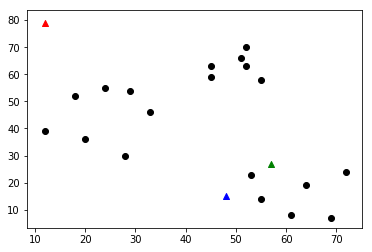

In [68]:
#make 3 random points as centroids and assign to a dictionary

k = 3

centroids = {
    i+1 : [np.random.randint(0,80),np.random.randint(0,80)]
    for i in range(k)
}
print(centroids)

plt.scatter(df['x'],df['y'], color = 'black')
colmap = {1:'r',2:'b',3:'g'}

for i in centroids.keys():
    plt.scatter(centroids[i][0],centroids[i][1],color=colmap[i], marker="^")
    
plt.show()

In [69]:
df = assignment(df,centroids)
print(df.head())

    x   y  distance_from_1  distance_from_2  distance_from_3  closest color
0  12  39        40.000000        43.266615        46.572524        1     r
1  20  36        43.737855        35.000000        38.078866        2     b
2  28  30        51.546096        25.000000        29.154759        2     b
3  18  52        27.658633        47.634021        46.324939        1     r
4  29  54        30.232433        43.382024        38.897301        1     r


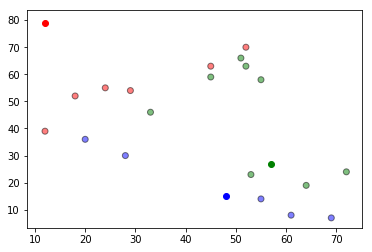

In [70]:
plt.scatter(df['x'], df['y'], color=df['color'], alpha=0.5, edgecolor='k')
for i in centroids.keys():
    plt.scatter(centroids[i][0],centroids[i][1] , color=colmap[i])    
plt.show()

In [71]:
centroids = update(centroids)

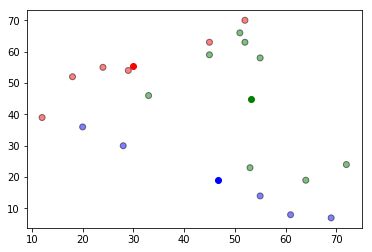

In [72]:
plt.scatter(df['x'], df['y'], color=df['color'], alpha=0.5, edgecolor='k')
for i in centroids.keys():
    plt.scatter(centroids[i][0],centroids[i][1] , color=colmap[i])    
plt.show()

In [73]:
#repeating assingment and update operation until there is no change
while True:
    closest_centroids = df['closest'].copy(deep=True)
    df = assignment(df, centroids)
    centroids = update(centroids)
    # break when df['closest'] column has stopped changing ie no datasample shows any change in its assigned cluster class. 
    if closest_centroids.equals(df['closest']):
        break

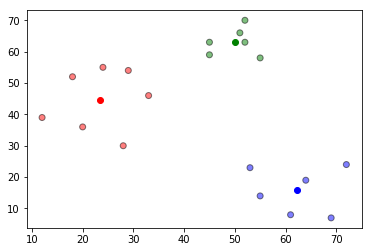

In [74]:
plt.scatter(df['x'], df['y'], color=df['color'], alpha=0.5, edgecolor='k')
for i in centroids.keys():
    plt.scatter(centroids[i][0],centroids[i][1] , color=colmap[i])
    
plt.show()